# Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.



**Notes for individual section are consolidated along with important comments in individual cells wherever required**




In [1]:
# Basic libraries for analysis included here
# Other libraries are imported in below cells as required
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## 1.0 Loading and Cleaning Data

#### 1.1 Importing and Inspecting data

In [2]:
df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking for the shape
df.shape

(9240, 37)

In [4]:
# to get the distribution of numeric values
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
#checking overall information of columns and datapoints
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### 1.2 Data Cleaning

In [6]:
#Validating percentage of null values in all the columns
round(df.isnull().mean(),3)

Prospect ID                                      0.000
Lead Number                                      0.000
Lead Origin                                      0.000
Lead Source                                      0.004
Do Not Email                                     0.000
Do Not Call                                      0.000
Converted                                        0.000
TotalVisits                                      0.015
Total Time Spent on Website                      0.000
Page Views Per Visit                             0.015
Last Activity                                    0.011
Country                                          0.266
Specialization                                   0.156
How did you hear about X Education               0.239
What is your current occupation                  0.291
What matters most to you in choosing a course    0.293
Search                                           0.000
Magazine                                         0.000
Newspaper 

In [7]:
# As industry standard removing Columns with null values > 45%
#Below function removes columns with missing value > 45%
def remove_miss_val(df, threshold):
    # Calculate the percentage of missing values per column
    missing_percentage = df.isnull().mean()
    
    # Filter columns with missing values less than or equal to the threshold
    columns_to_keep = missing_percentage[missing_percentage <= threshold].index
    
    # Return the DataFrame with only the columns that meet the threshold condition
    return df[columns_to_keep]

In [8]:
# df1 Dataframe created with columns less than 45% of missing data
df1=remove_miss_val(df,0.45)

In [9]:
df1.isnull().mean()

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.155628
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

In [10]:
len(df1.columns)

32

In [11]:
#Tags and Lead profile having Missing value close to 30%> also seems to be insignificant to the analysis
#Hence removing it using the function
df2=remove_miss_val(df1,0.30)

In [12]:
# As Missing value % of Lead profile is similar to values of other columns removing it individually
df2=df2.drop(['Lead Profile'],axis=1)

In [13]:
# Now analysing columns with missing values greater than 15%(Next Highest missing value)
Missing_value_15=df2.columns[df2.isnull().mean()>0.15]
Missing_value_15

Index(['Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'City'],
      dtype='object')

In [14]:
# Identifying individual distribution of data
for col in Missing_value_15:
    print(df2[col].value_counts())
    print("----------------------")

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

'
There are a few columns in which there is a level called `'Select'` 
which basically means that the student had not selected the option for that particular column.
These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.
'

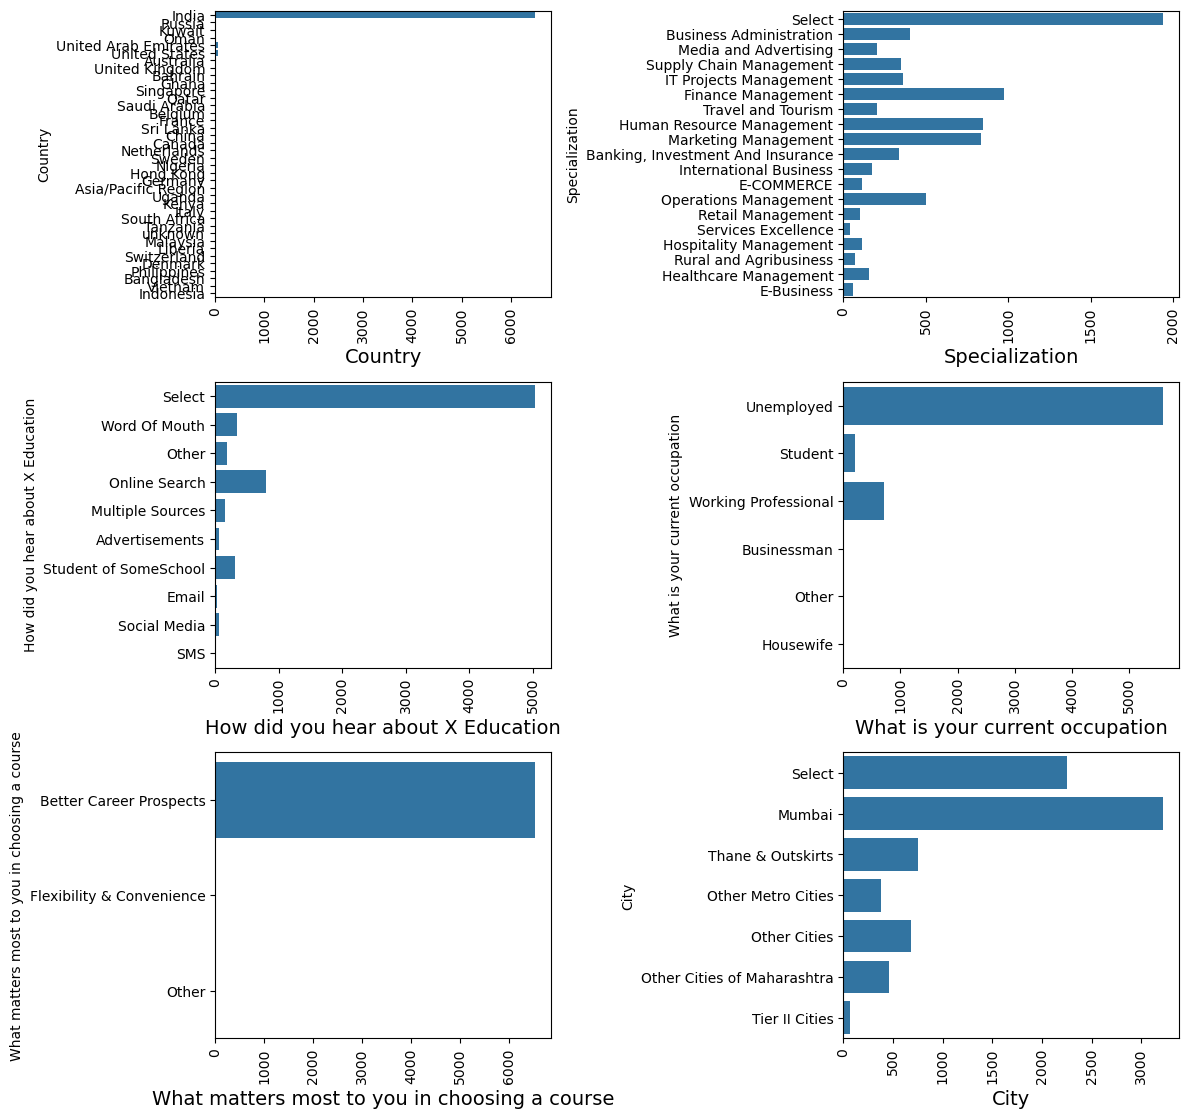

In [15]:
## Function to visualise the missing value columns
def countplot(x, fig):
    plt.subplot(5,2, fig)
    sns.countplot(df2[x])
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)
    plt.tight_layout() 

plt.figure(figsize=(12,18))

## Iterating the 15%> columns to plot
i=1
for x in Missing_value_15:
    countplot(x,i)
    i+=1

In [16]:
# Based on the value counts and visual representation 
# 'What matters most to you in choosing a course','country' have only one value repetition
# 'City' has maximum value repetition of select and mumbai, this might not provide any valuable insights about leads
# which is not ideal for current analysis hence removing three columns.

In [17]:
# removing three columns mentioned above
df2=df2.drop(['What matters most to you in choosing a course','City','Country'],axis=1)

In [18]:
# lets check the values of remaining 15% data columns and their individual value count percentage
# "Select" is 71% hence can be removed
print("\"How did you hear about X Education\" has Select % of",df2['How did you hear about X Education'].value_counts().max()/df2['How did you hear about X Education'].value_counts().sum())
print("Specialization has missing data % of",df2['Specialization'].value_counts().max()/df2['Specialization'].value_counts().sum())
df2=df2.drop(['How did you hear about X Education'],axis=1)

"How did you hear about X Education" has Select % of 0.7170482013365562
Specialization has missing data % of 0.24891053576006153


In [19]:
# Renaming to Occupation 
df2 = df2.rename(columns={'What is your current occupation': 'Occupation'})

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

In [21]:
# Specialisation and 'Occupation' might provide more insights so replacing  NA values as "Not provided"
df2['Specialization'] = df2['Specialization'].fillna('not provided') 
df2['Occupation'] = df2['Occupation'].fillna('not provided') 

In [22]:
# removing prospect_id and lead number as they are unique key for each leads
# On finding Lead score this values would not be helpful hence removing them
leads=df2.drop(['Prospect ID','Lead Number'],axis=1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  Occupation                          

In [23]:
# Select is only available in the "Specialisation" replacing it with "not provided " for uniformity in missing values
leads['Specialization'] = leads['Specialization'].replace("Select", "not provided")

In [24]:
leads.isnull().mean()

Lead Origin                                 0.000000
Lead Source                                 0.003896
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 0.014827
Total Time Spent on Website                 0.000000
Page Views Per Visit                        0.014827
Last Activity                               0.011147
Specialization                              0.000000
Occupation                                  0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

In [25]:
#For remaining low % missing values we are imputing them based on the % and importance of variable
from sklearn.impute import SimpleImputer

# For categorical columns, impute with the most frequent value
categorical_cols = leads.select_dtypes(include=['object']).columns
imputer_categorical = SimpleImputer(strategy='most_frequent')
leads[categorical_cols] = imputer_categorical.fit_transform(leads[categorical_cols])

# For numeric columns, impute with mean or median
numeric_cols = leads.select_dtypes(include=['float64', 'int64']).columns
imputer_numeric = SimpleImputer(strategy='mean')  # or 'median'
leads[numeric_cols] = imputer_numeric.fit_transform(leads[numeric_cols])


In [26]:
leads.isnull().mean()

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
Occupation                                  0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

#### Notes - Data Cleaning

* <font color= lightgreen> As per industry standarad removed columns with More than 45% of missing values.
* <font color= lightgreen> "Select" in this Dataset is similar to Not applicable or missing values("How did you hear about X Education has missing data"-71%-Select hence removed)
  
**Missing values handling**(Removal of column) has they do not provide more insights to Lead scoring

* <font color= lightgreen> 'country' has only one value repetition 'India'
* <font color= lightgreen>  'Tags' and 'Lead profile' doesn't have valuable data points to add to analysis
* <font color= lightgreen> 'City' has maximum value repetition of select and mumbai, this might not provide any valuable insights about leads
  
**Missing values handling**(Replacing Missing values with 'not provided') to minimise loss of data points for analysis.

* <font color= lightgreen> 'Specialization' and 'Occupation' missing values are replaced with 'not provided'
* <font color= lightgreen> 'Specialization' Select values are replaced with 'not provided'

**Remaining Missing Values are very less 2%<**
* <font color= lightgreen> Though it seem insignificant , we cannot proceed with model building with `NAN values`
* <font color= lightgreen> Hence imputing them with imputer function in SKLearn
* <font color= lightgreen> For lead source - Categorical column imuted with common occurence as only 36/9240 are empty.
* <font color= lightgreen> For Numeric variables - Total visits,pages view per visit,last activity all have less 0.1 % missing values , wich are imputed by corresponding mean as best practise


## 2.0 EDA

**Observations are provided in the Notes-EDA section consolidated**

In [27]:
# Function to divide numerical,categorical columns
def classify_variables(df):
    # Dictionary to store lists of each variable type
    variable_types = {
        'categorical': [],
        'numerical': [],
        'boolean': []
    }
    
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            variable_types['numerical'].append(column)
        elif pd.api.types.is_bool_dtype(df[column]):
            variable_types['boolean'].append(column)
        else:
            variable_types['categorical'].append(column)
    
    return variable_types

variable_types = classify_variables(leads)
print(variable_types)

{'categorical': ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Specialization', 'Occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], 'numerical': ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], 'boolean': []}


#### 2.1 Univariate Analysis

##### 2.1.1 Univariate Analysis on  Categorical

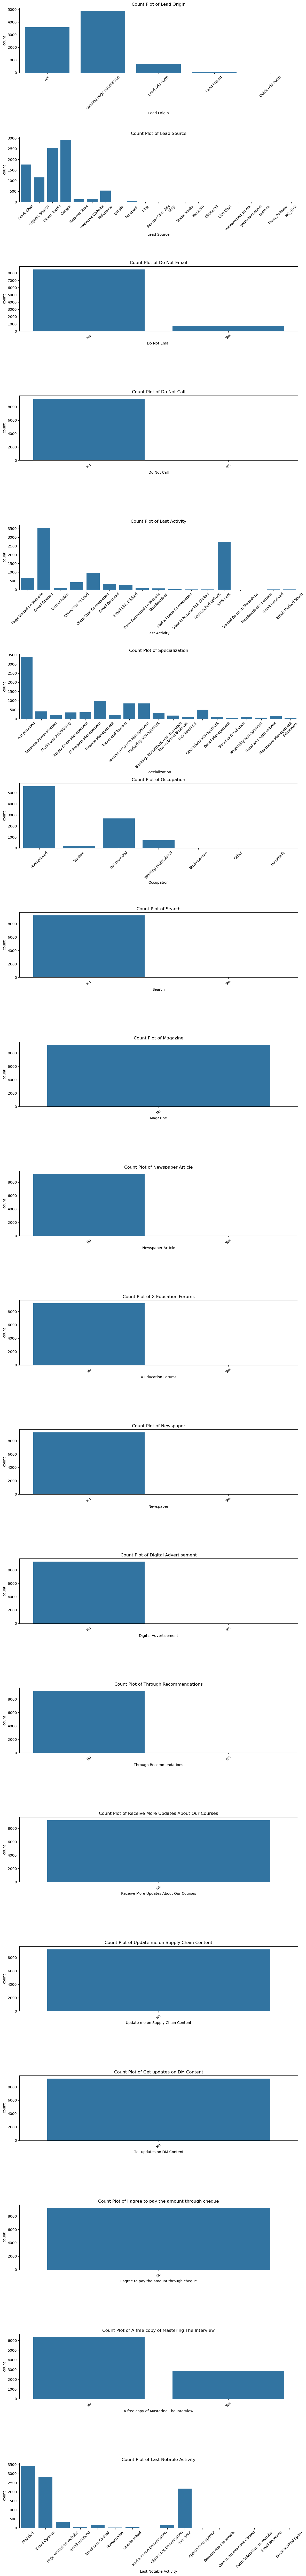

In [28]:
def plot_categorical_countplots(df):
    # Loop through each column to check for categorical data
    categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns
    
    # Set up a grid for plotting
    plt.figure(figsize=(12, len(categorical_columns) * 5))  # Adjust height based on number of plots
    
    # Plot each categorical variable
    for i, column in enumerate(categorical_columns, start=1):
        plt.subplot(len(categorical_columns), 1, i)
        sns.countplot(x=column, data=df)
        plt.title(f'Count Plot of {column}')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_categorical_countplots(leads)


In [29]:
# Iteration to view only value counts of categorical variables
for col in leads.select_dtypes(include=['object', 'category', 'bool']).columns:
    print(leads[col].value_counts())
    print("----------------------")

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
----------------------
Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
----------------------
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
----------------------
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64
----------------------
L

In [30]:
leads=leads.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement','X Education Forums','Search','Magazine','Newspaper Article','Newspaper'],axis=1)

In [31]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   float64
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   float64
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  Occupation                              9240 non-null   obje

##### 2.1.2 Univariate Analysis on  Numerical

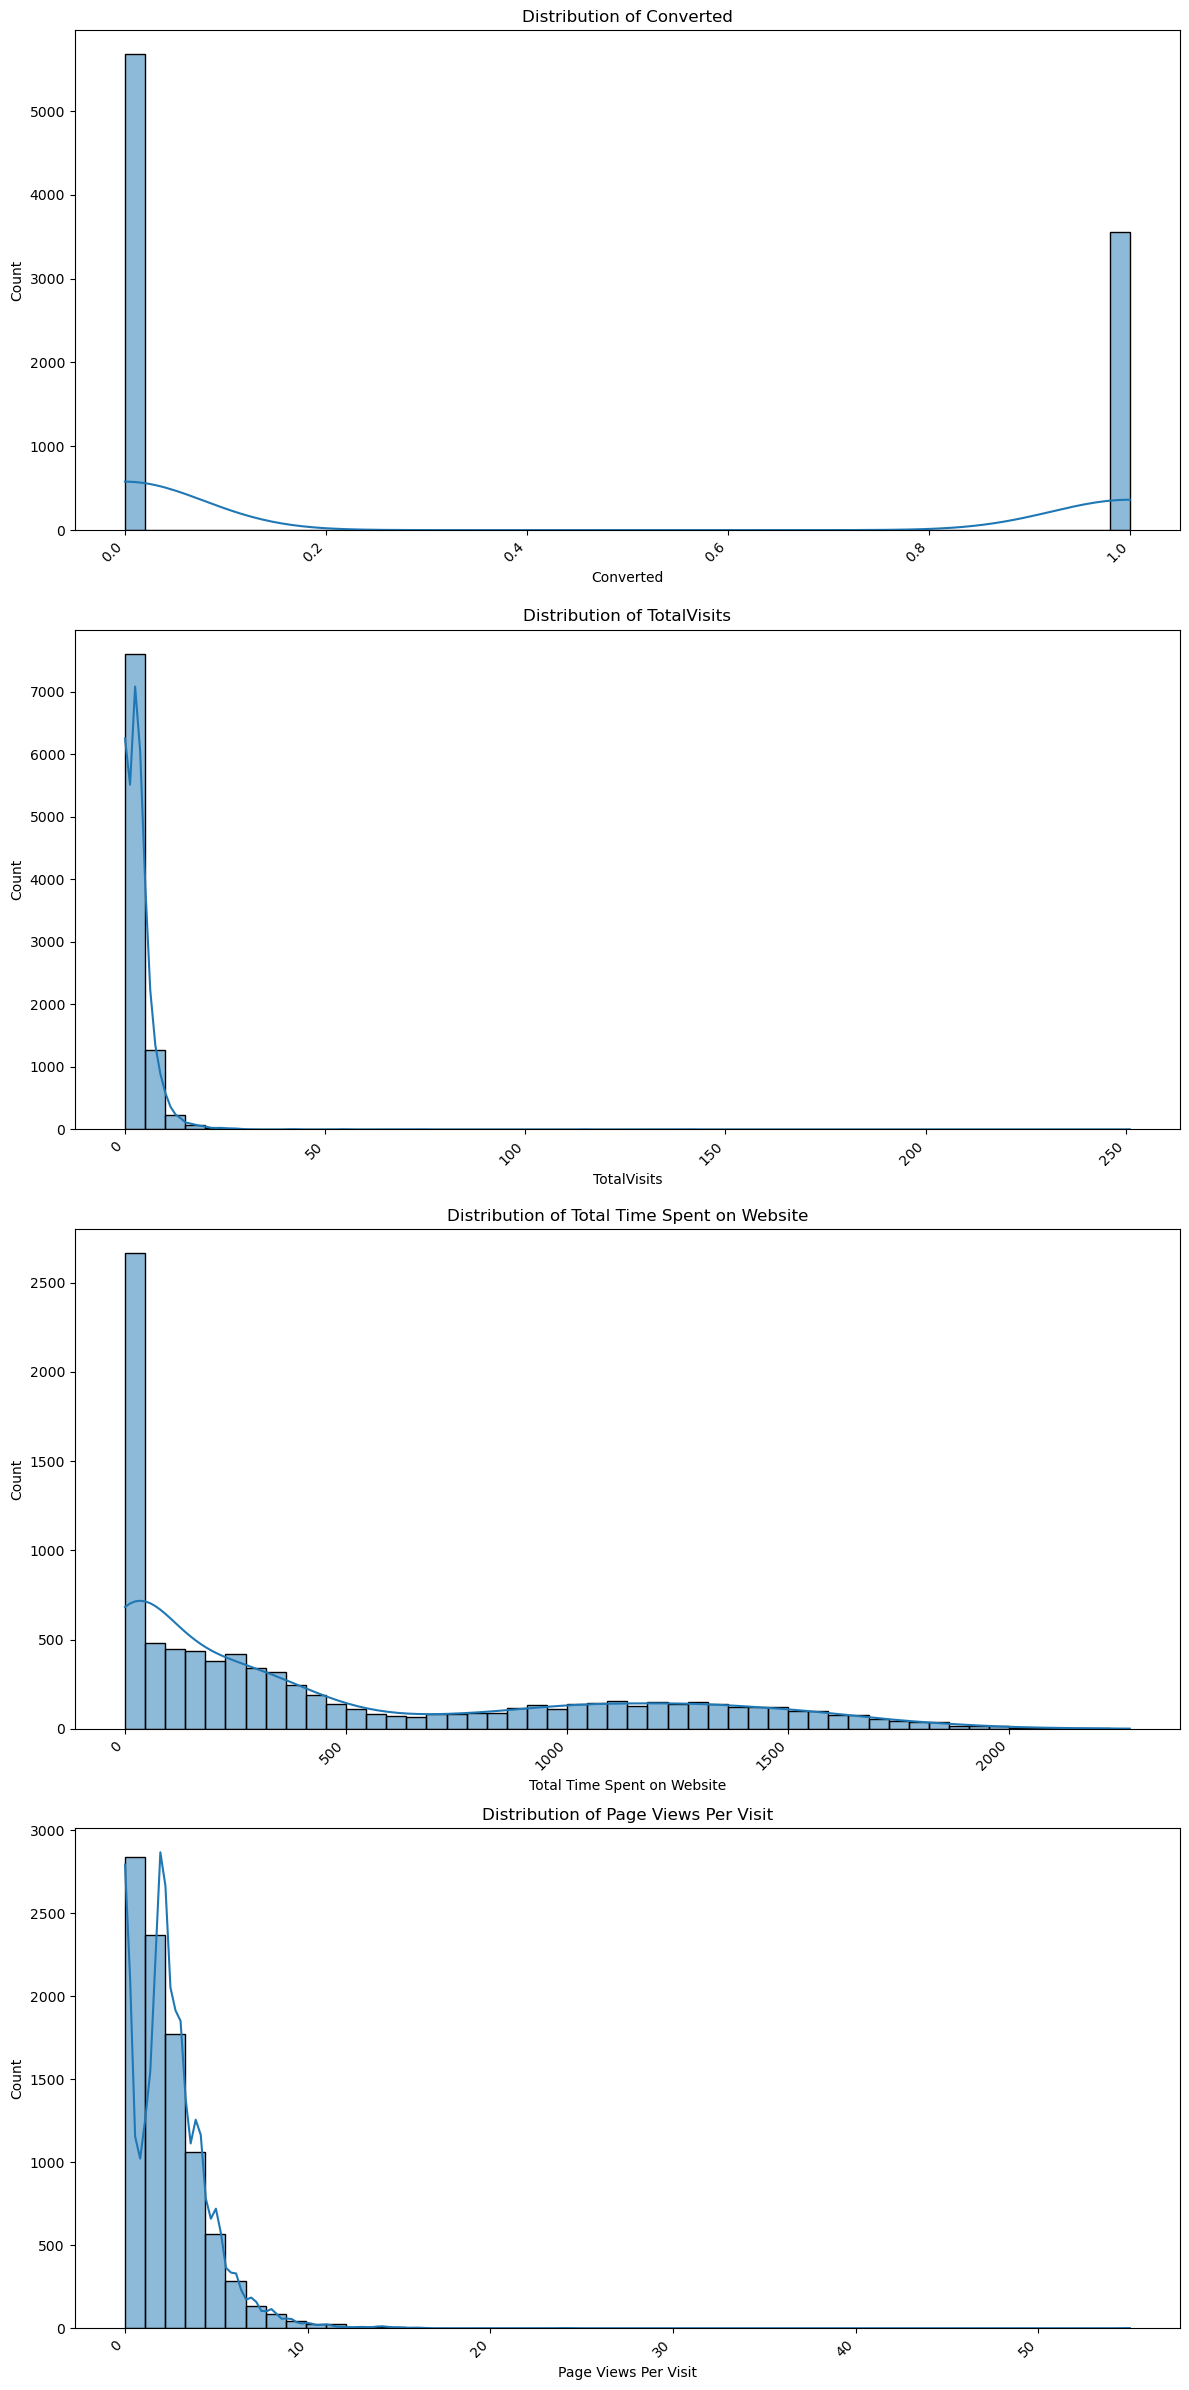

In [32]:
# Function to plot numeric variables
def plot_numerical_histplots(df):
    # Loop through each column to check for numerical data
    numerical_columns = df.select_dtypes(include=['number']).columns
    
    # Set up a grid for plotting
    plt.figure(figsize=(12, len(numerical_columns) * 6))
    
    # Plot each numerical variable (using histplot for numerical data)
    for i, column in enumerate(numerical_columns, start=1):
        plt.subplot(len(numerical_columns), 1, i)
        sns.histplot(df[column], kde=True, bins=50) 
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        
        # Rotate x labels to prevent overlap and set larger font size
        plt.xticks(rotation=45, ha='right', fontsize=10)
        
        # Adjust the x-axis limits if necessary
        plt.tight_layout()

    plt.show()

plot_numerical_histplots(leads)


#### 2.2 Multivariate Analysis

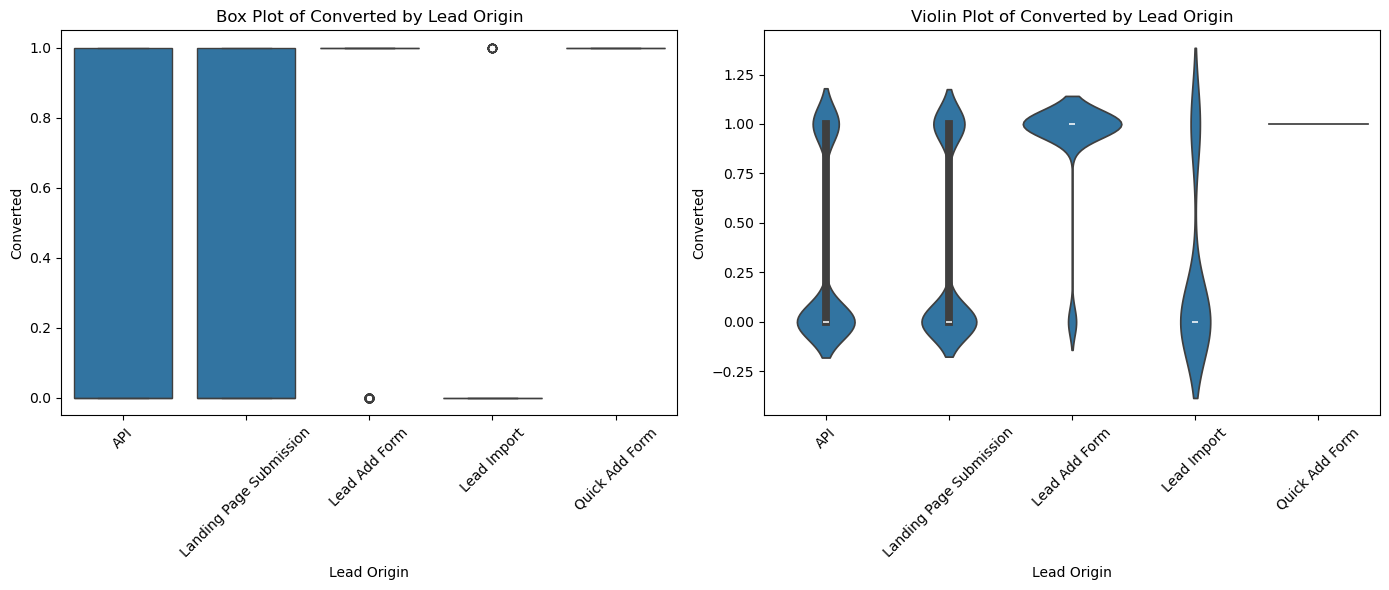

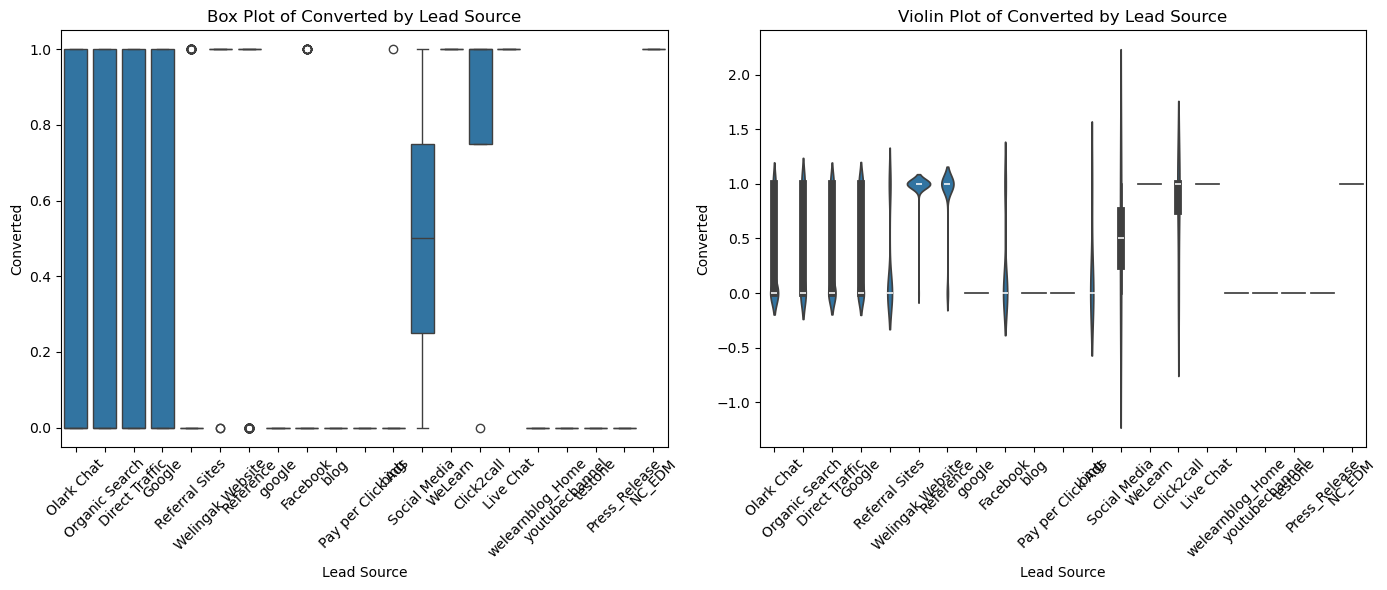

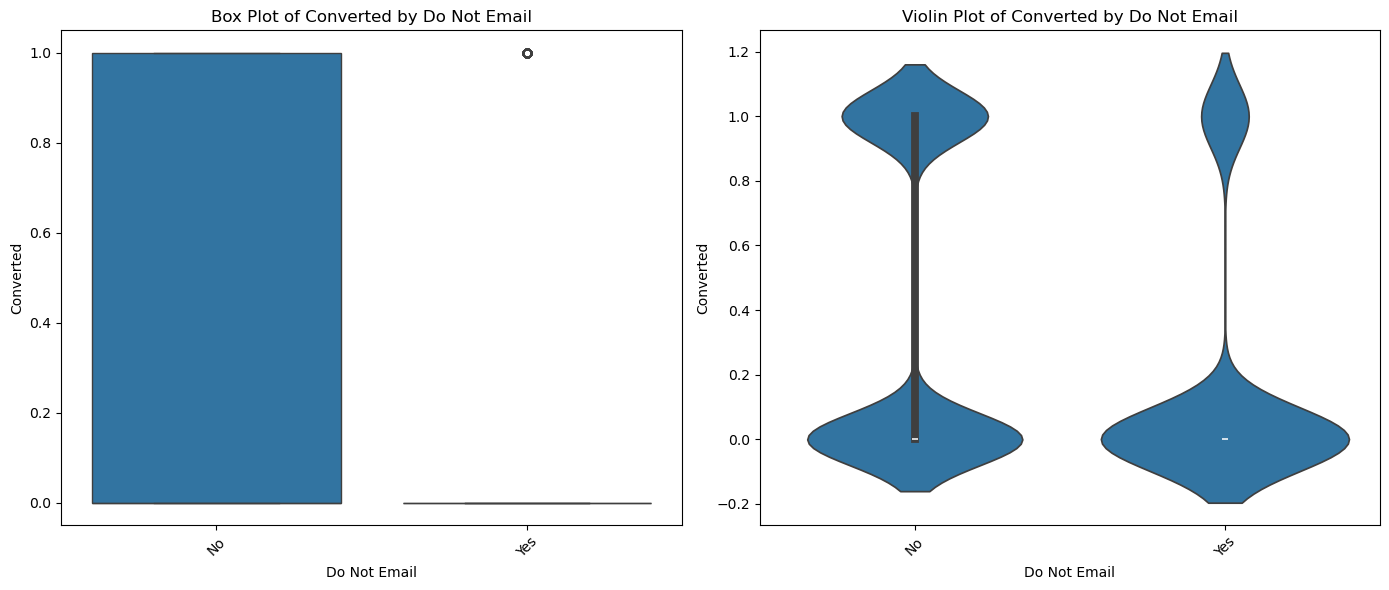

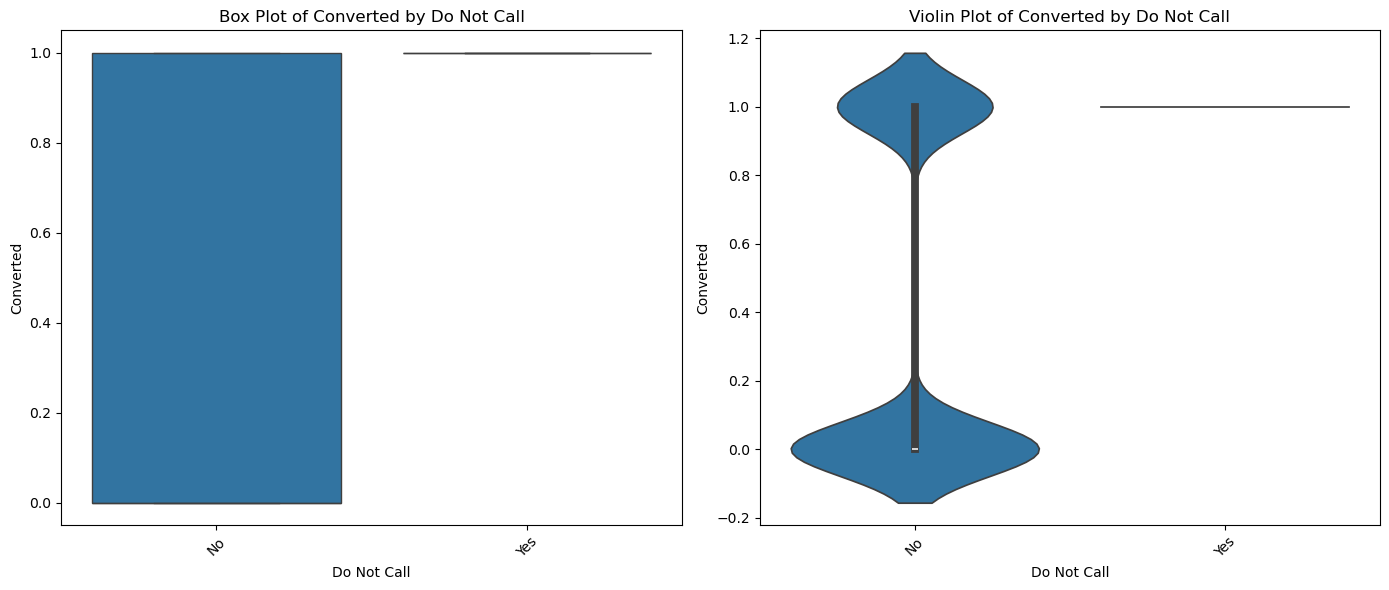

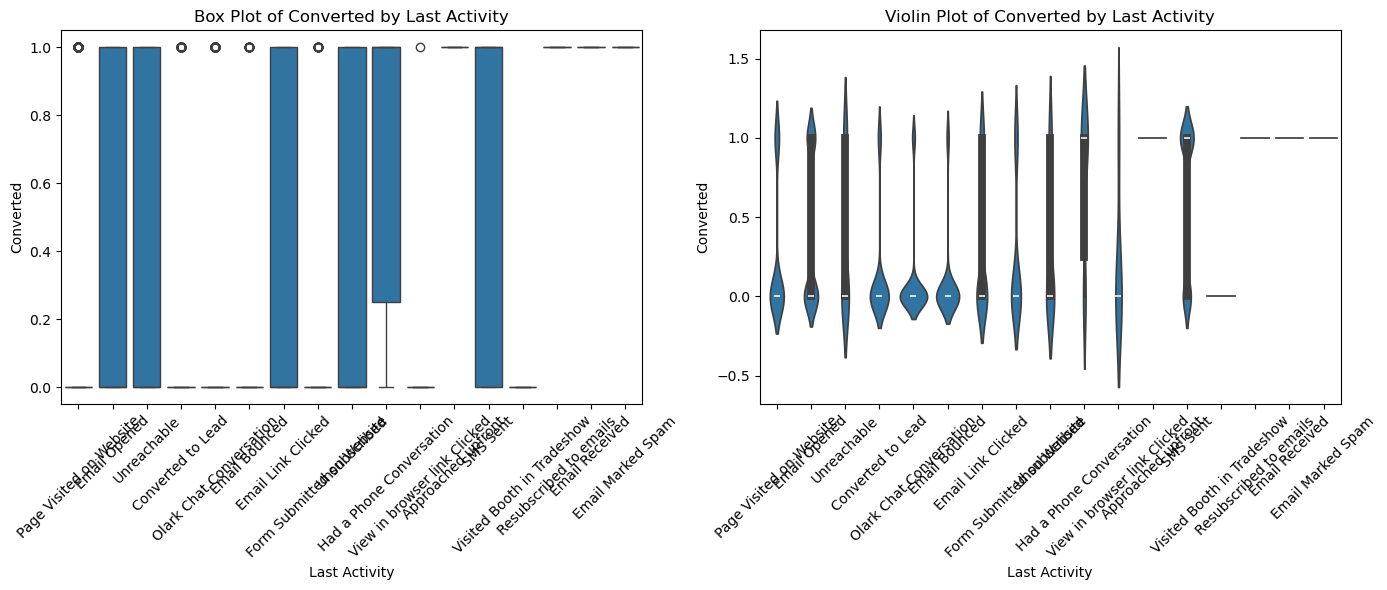

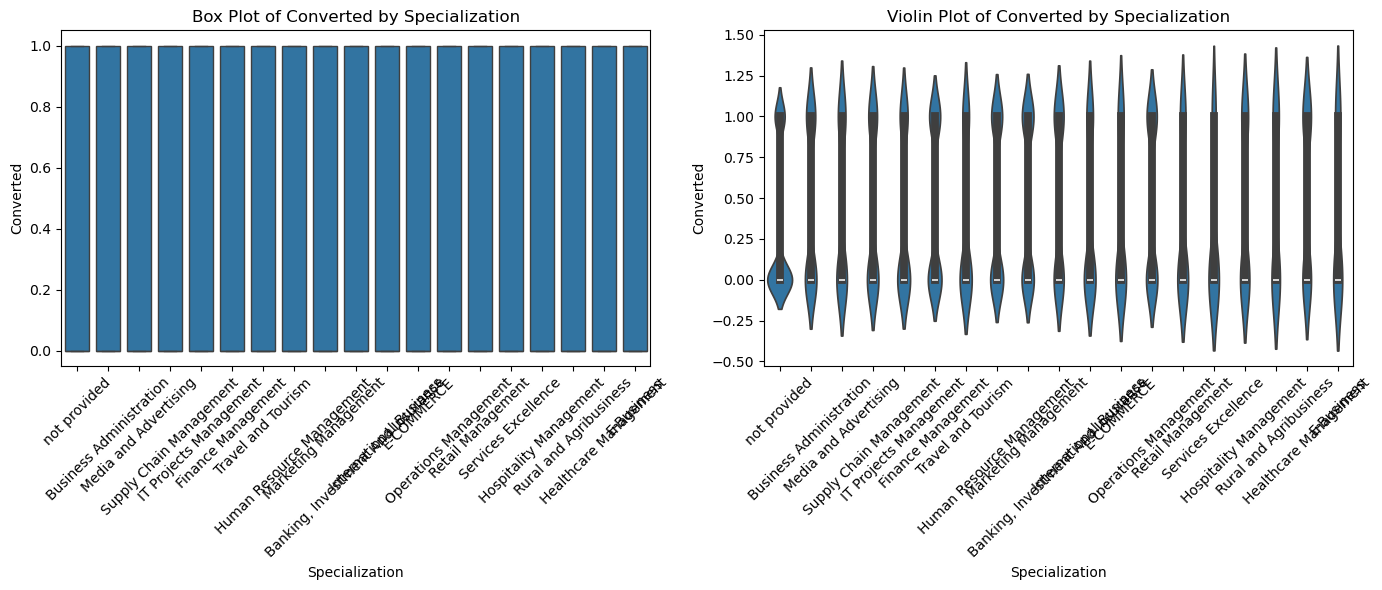

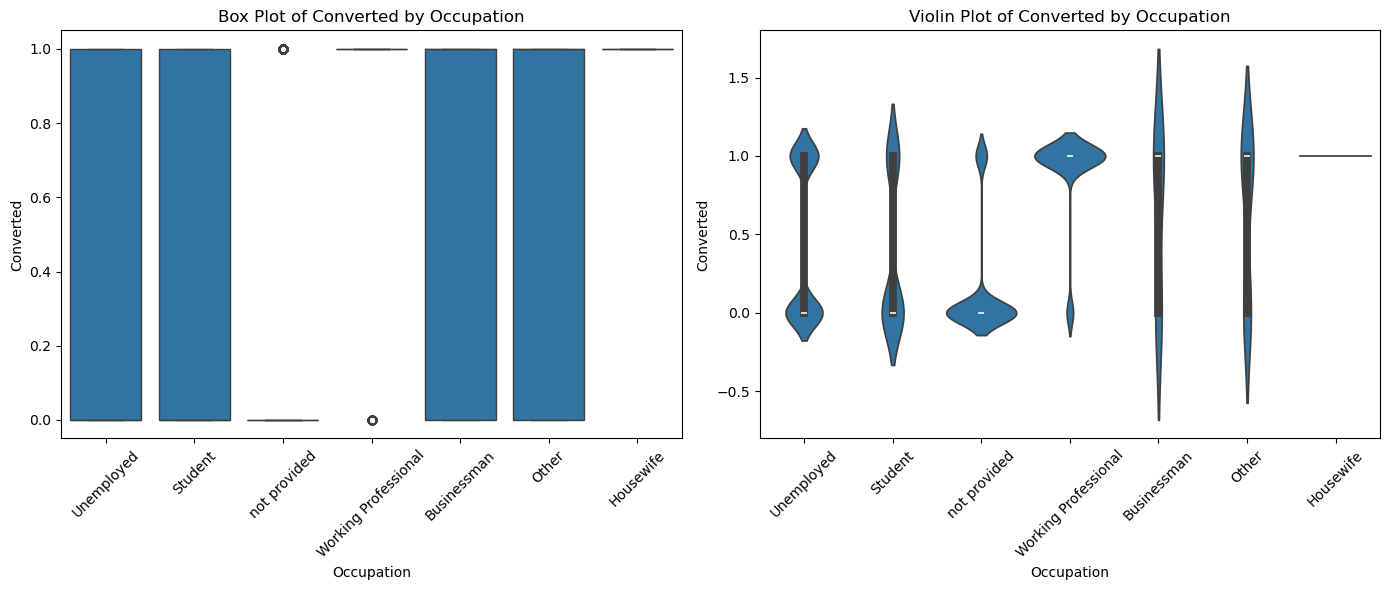

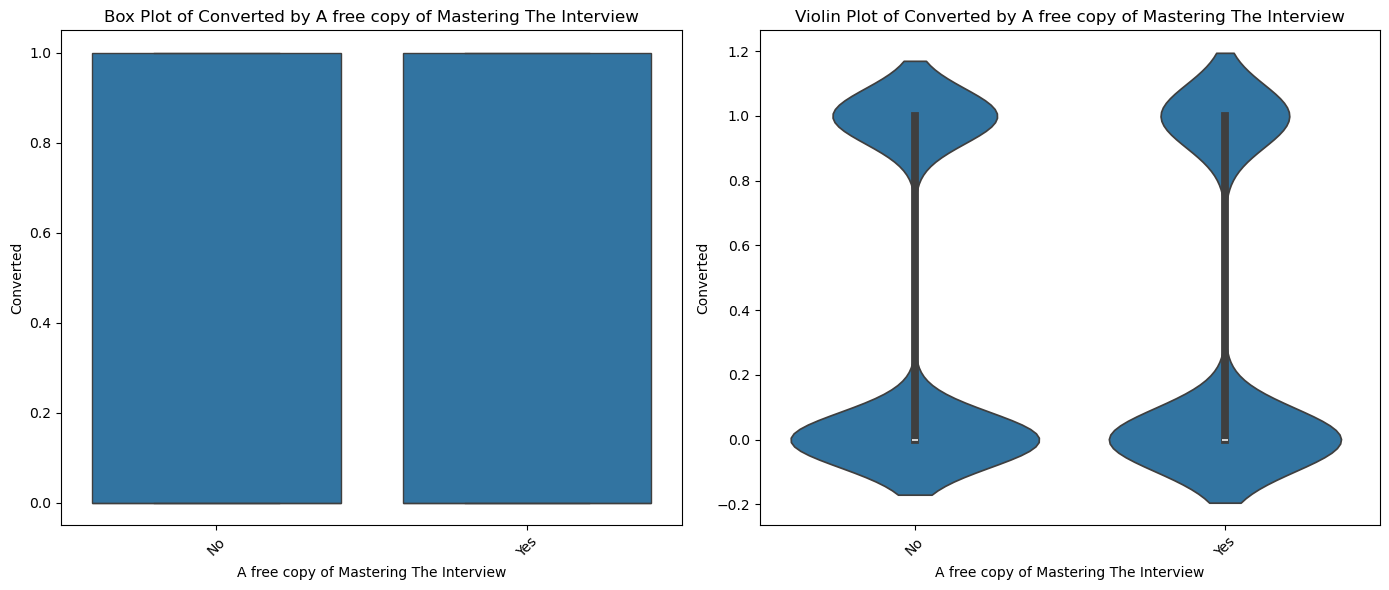

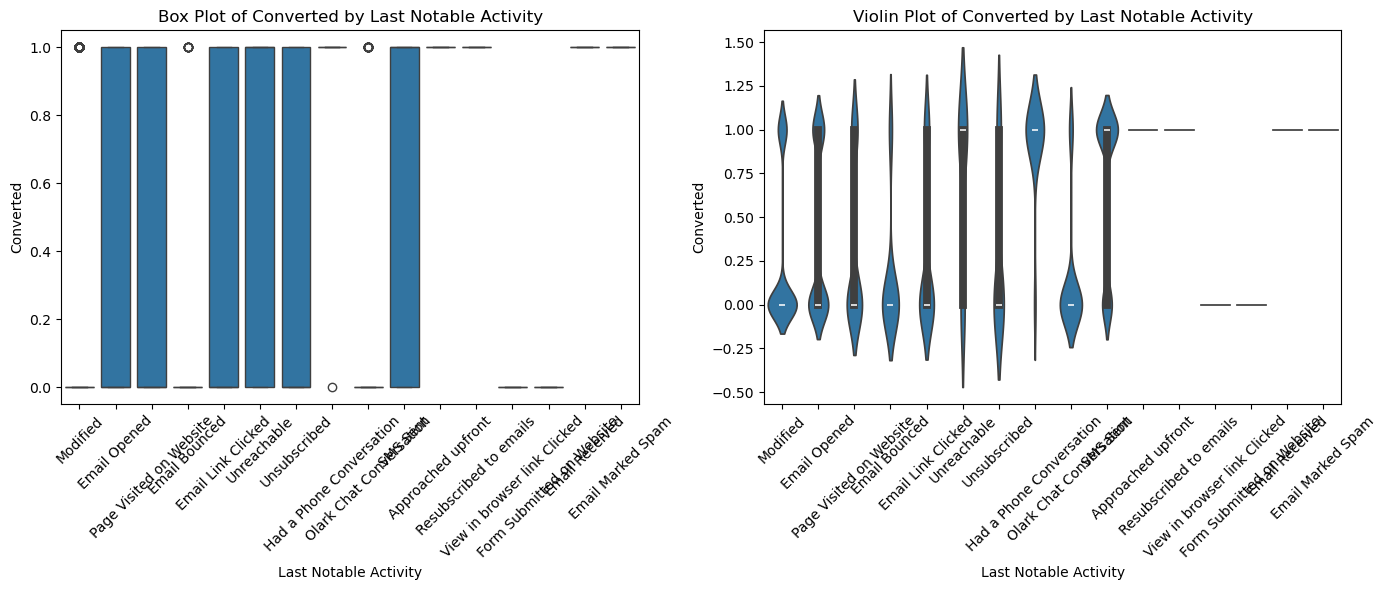

In [33]:
# function to to do multivariate analysis
def multivariate_analysis_cat_num(df):
    # Identify categorical and numerical columns
    categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns
    numerical_columns = df.select_dtypes(include=['number']).columns
    
    # Loop through each pair of categorical and numerical variables
    for cat_col in categorical_columns:
        for num_col in numerical_columns:
            if num_col=='Converted':
                
                plt.figure(figsize=(14, 6))
            
                # Box plot
                plt.subplot(1, 2, 1)
                sns.boxplot(x=cat_col, y=num_col, data=df)
                plt.title(f'Box Plot of {num_col} by {cat_col}')
                plt.xticks(rotation=45)
                
                # Violin plot
                plt.subplot(1, 2, 2)
                sns.violinplot(x=cat_col, y=num_col, data=df)
                plt.title(f'Violin Plot of {num_col} by {cat_col}')
                plt.xticks(rotation=45)
                
                plt.tight_layout()
                plt.show()

multivariate_analysis_cat_num(leads)

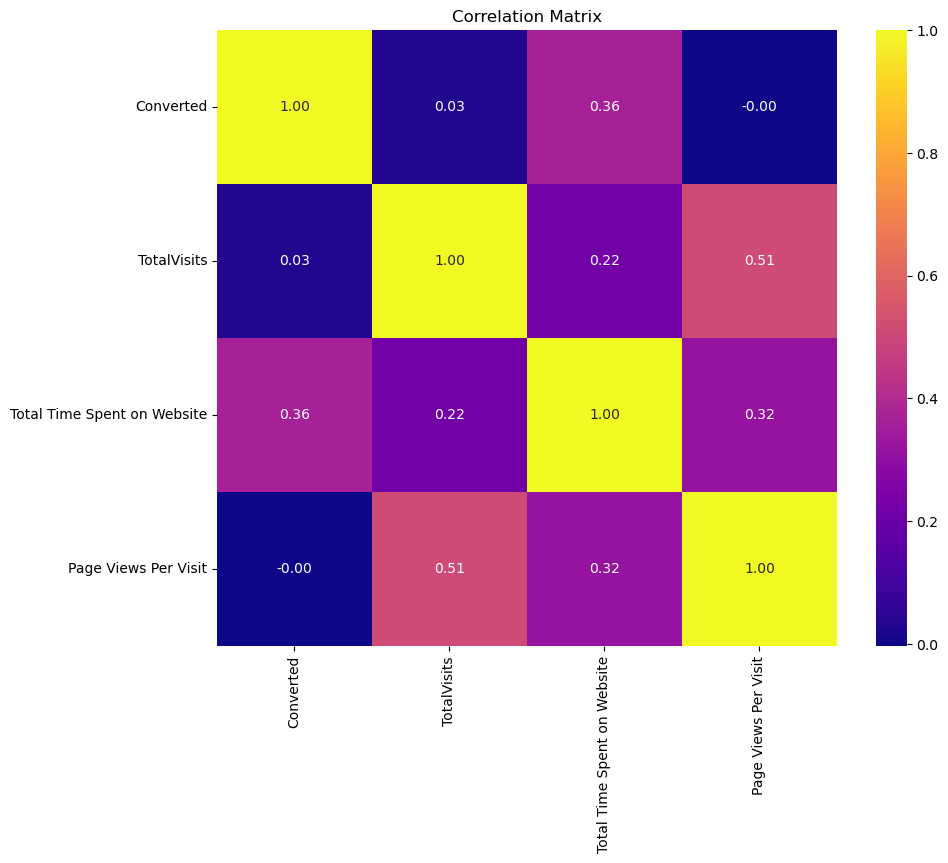

In [34]:
# To check the correlation among varibles
correlation_matrix=leads.select_dtypes(include='number').corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [35]:
# Outlier Analysis on Numeric columns
numeric = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.445238,487.698268,2.362820
std,4.818723,548.021466,2.145333
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


In [36]:
def treat_outliers_iqr(df, column_name, lower_multiplier=1.5, upper_multiplier=1.5):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds
    lower_bound = Q1 - lower_multiplier * IQR
    upper_bound = Q3 + upper_multiplier * IQR
    
    # Filter out the outliers
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_filtered

In [37]:
outliers = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
Cleaned_leads=treat_outliers_iqr(leads.select_dtypes(include='number'),outliers)
Cleaned_leads.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,0.0,8973.000000,9240.000000,8880.000000
mean,NaN,2.992644,487.698268,2.108882
std,NaN,2.563758,548.021466,1.644409
min,NaN,0.000000,0.000000,0.000000
25%,NaN,1.000000,12.000000,1.000000
50%,NaN,3.000000,248.000000,2.000000
75%,NaN,4.000000,936.000000,3.000000
90%,NaN,6.000000,1380.000000,4.000000
99%,NaN,10.000000,1840.610000,6.000000
max,NaN,11.000000,2272.000000,6.000000


#### Notes - EDA

* <font color= lightgreen> Unique value columns that have more than 98 % of data on a single value like "No" do not provide insights in analysis. Hence removing them
* <font color= lightgreen> These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis.
  
**Univariate Numeric Analysis**

* <font color= lightgreen> 'Total Time Spent on Website','TotalVisits','Page Views Per Visit' displays a downward trend.
* <font color= lightgreen>  'Tags' and 'Lead profile' doesn't have valuable data points to add to analysis
* <font color= lightgreen> 'City' has maximum value repetition of select and mumbai, this might not provide any valuable insights about leads
  
**Multivariate Analysis**

* <font color= lightgreen> 'Lead Origin'has insights on distribution based on API and'Landing page submission' , Lead Add form shows higer concentration of 'Yes'
* <font color= lightgreen> 'Lead Source' shows promising insights about conversion and major sources like olark,google, we chat etc wich needs to be explored.
* <font color= lightgreen> 'Last Activity' and 'Last Notable activity' shows promising insights about conversion
* <font color= lightgreen> Most of the categorical columns shows insight with respect to 'Converted'

**Corelation**(Numeric variables)
* <font color= lightgreen> Correlation between Total Visits and Page view visit is observed 0.51 which is comparatively lower and no other major correlation observed

**Outliers**
* <font color= lightgreen> Outliers are present in the three numeric columns , It is not a major issue for analysis. Hence steps are mentioned for outlier treatment , but not actually treated.

## 3.0 Dummy Variable

In [38]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   float64
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   float64
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  Occupation                              9240 non-null   obje

In [39]:
#identifying Categorical/Object columns for dummy variable creation
temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'Occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [40]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(leads[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email','Do Not Call', 'Last Activity', 'Occupation','A free copy of Mastering The Interview', 'Last Notable Activity']],dtype='int', drop_first=True)
# Add the results to the master dataframe
leads_final = pd.concat([leads, dummy], axis=1)
leads_final

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0.0,0.0,0.0,0.00,Page Visited on Website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0.0,5.0,674.0,2.50,Email Opened,not provided,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1.0,2.0,1532.0,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0.0,1.0,305.0,1.00,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1.0,2.0,1428.0,1.00,Converted to Lead,not provided,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1.0,8.0,1845.0,2.67,Email Marked Spam,IT Projects Management,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0.0,2.0,238.0,2.00,SMS Sent,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0.0,2.0,199.0,2.00,SMS Sent,Business Administration,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1.0,3.0,499.0,3.00,SMS Sent,Human Resource Management,...,0,0,0,0,0,0,1,0,0,0


In [41]:
leads_final=leads_final.drop(['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email','Do Not Call', 'Last Activity', 'Occupation','A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1)
leads_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Converted                                           9240 non-null   float64
 1   TotalVisits                                         9240 non-null   float64
 2   Total Time Spent on Website                         9240 non-null   float64
 3   Page Views Per Visit                                9240 non-null   float64
 4   Lead Origin_Landing Page Submission                 9240 non-null   int32  
 5   Lead Origin_Lead Add Form                           9240 non-null   int32  
 6   Lead Origin_Lead Import                             9240 non-null   int32  
 7   Lead Origin_Quick Add Form                          9240 non-null   int32  
 8   Specialization_Business Administration              9240 non-null   int32  
 9

#### Notes - Dummy Variable

* <font color= lightgreen> Dummy Variables are created for Categorical columns and the original categorical columns are removed

## 4.0 Test-Train Split

In [42]:
# Import the required library
from sklearn.model_selection import train_test_split

In [43]:
X=leads_final.drop(['Converted'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674.0,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532.0,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305.0,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428.0,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
y=leads_final['Converted']
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Converted, dtype: float64

In [45]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

#### 4.1 Scaling

In [46]:
#import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
#Scale the three nunmeric features
scaler=MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']]=scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3112,0.007968,0.182867,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8413,0.019920,0.679538,0.208333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2961,0.011952,0.553928,0.041667,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0.023904,0.504660,0.062500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2740,0.011952,0.445184,0.125000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (6468, 85)
y_train Size (6468,)


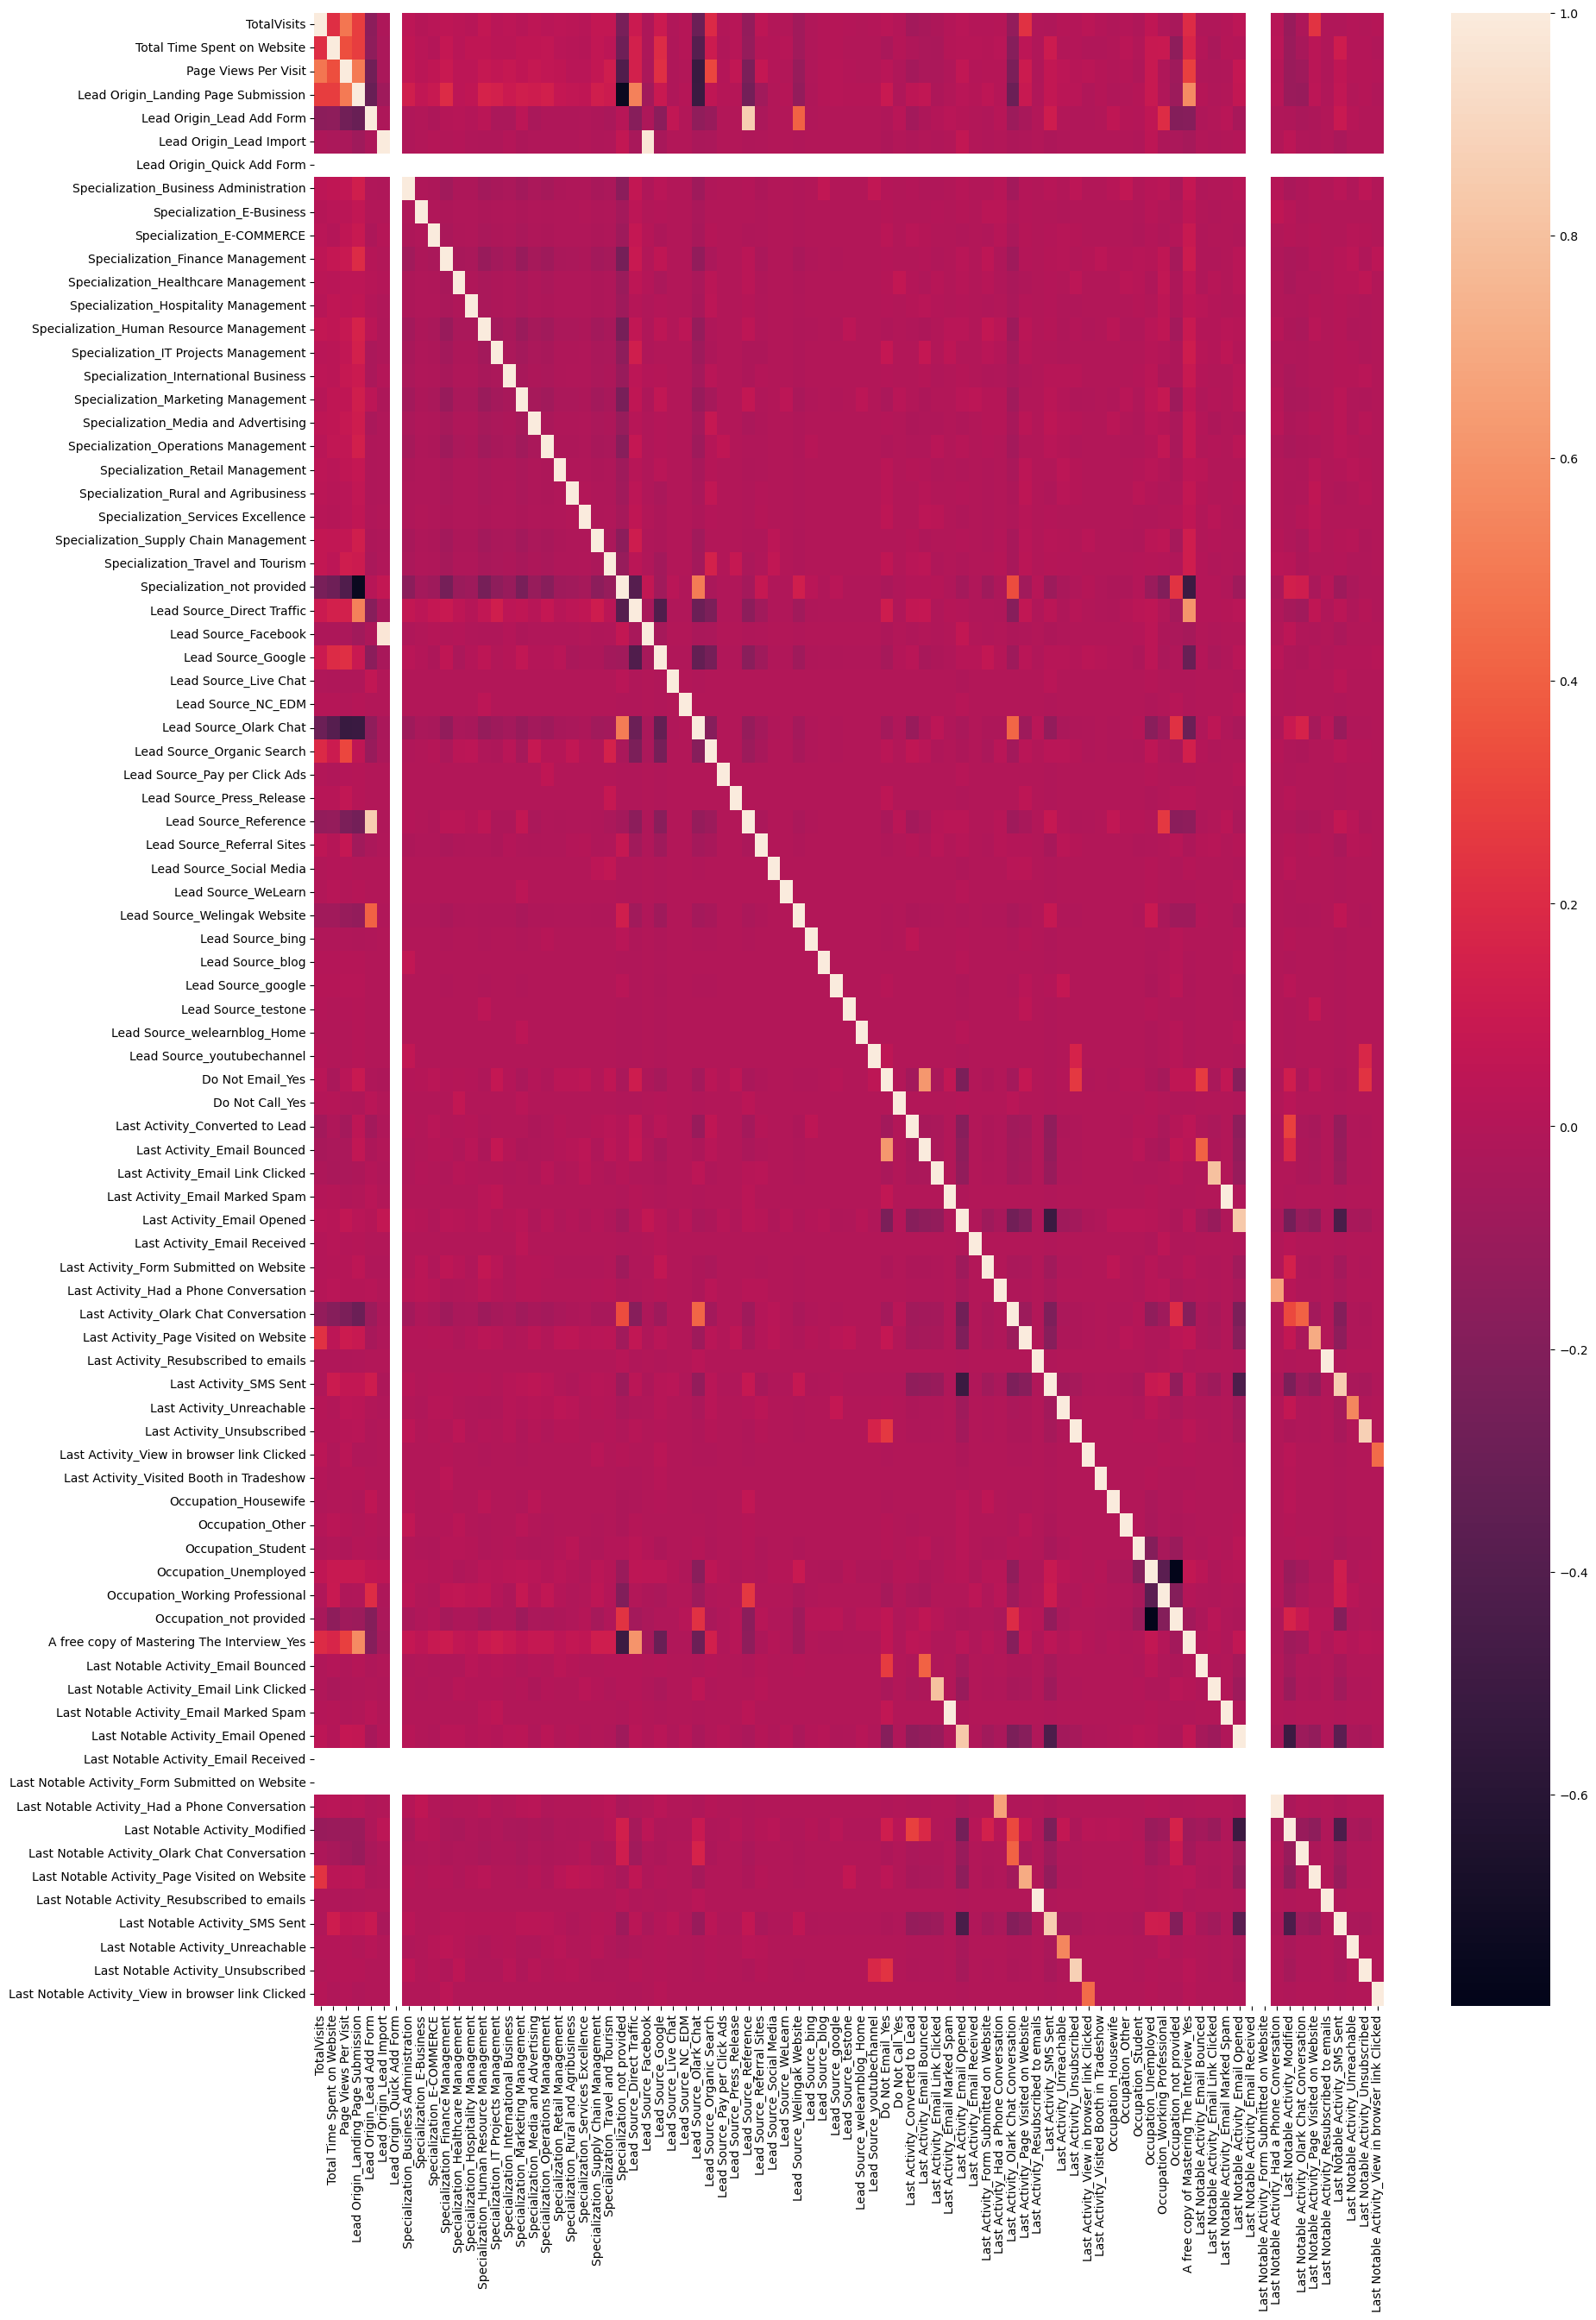

In [48]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

In [49]:
correlation_matrix = leads_final.corr().round(2)
print(correlation_matrix)

                                                    Converted  TotalVisits  \
Converted                                                1.00         0.03   
TotalVisits                                              0.03         1.00   
Total Time Spent on Website                              0.36         0.22   
Page Views Per Visit                                    -0.00         0.51   
Lead Origin_Landing Page Submission                     -0.05         0.29   
...                                                       ...          ...   
Last Notable Activity_Resubscribed to emails             0.01        -0.01   
Last Notable Activity_SMS Sent                           0.35        -0.00   
Last Notable Activity_Unreachable                        0.04         0.01   
Last Notable Activity_Unsubscribed                      -0.01         0.00   
Last Notable Activity_View in browser link Clicked      -0.01         0.01   

                                                    Total Time 

#### Notes - Test-Train Split

* <font color= lightgreen> Scaling done on 3 numeric variables of X_train.
* <font color= lightgreen> Since the number of variables are pretty high, both table and heatmap view doesnt provide meaningful insights.
* <font color= lightgreen> As count of variables is large,difficult to deceide on variable to be dropped. It will be done after RFE.

## 5.0 Model Building

As established, that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [50]:
# Import 'Logistic Regression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [51]:
# Import 'RFE'
from sklearn.feature_selection import RFE

In [52]:
# Running RFE with 15 variables as output
rfe = RFE(logreg,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [53]:
# Features selected based on the RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 54),
 ('Lead Origin_Quick Add Form', False, 69),
 ('Specialization_Business Administration', False, 40),
 ('Specialization_E-Business', False, 32),
 ('Specialization_E-COMMERCE', False, 64),
 ('Specialization_Finance Management', False, 66),
 ('Specialization_Healthcare Management', False, 34),
 ('Specialization_Hospitality Management', False, 28),
 ('Specialization_Human Resource Management', False, 61),
 ('Specialization_IT Projects Management', False, 59),
 ('Specialization_International Business', False, 31),
 ('Specialization_Marketing Management', False, 63),
 ('Specialization_Media and Advertising', False, 30),
 ('Specialization_Operations Management', False, 65),
 ('Specialization_Retail Management', False, 21),
 ('Specialization_Rural and Agribus

In [54]:
rfe.support_

array([ True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False])

In [55]:
# Columns selected by RFE are now as part of 'col'
col=X_train.columns[rfe.support_]

In [56]:
#All the variables selected by RFE, next working on statistics part (p-values and the VIFs)
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Specialization_not provided', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Occupation_Housewife', 'Occupation_Working Professional',
       'Occupation_not provided',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [57]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [58]:
# Importing statsmodels
import statsmodels.api as sm

#### 5.1 Model 1

In [59]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2612.0
Date:                Tue, 19 Nov 2024   Deviance:                       5224.0
Time:                        13:37:51   Pearson chi2:                 6.90e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4106
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.4282      0.138    -10.360      0.000      -1.698      -1.158
TotalVisits                                        6.0471      2.064      2.930      0.003       2.002      10.093
Total Time Spent on Website                        4.4851      0.166     27.019      0.000       4.160       4.810
Lead Origin_Landing Page Submission               -0.9134      0.126     -7.236      0.000      -1.161      -0.666
Lead Origin_Lead Add Form                          3.1253      0.212     14.718      0.000       2.709       3.541
Specialization_not provided                       -0.7951      0.123     -6.489      0.000      -1.035      -0.555
Lead Source_Olark Chat                             1.2592      0.126     10.004      0.000       1.013       1.506
Lead Source_Welingak Website                       2.8292      1.031      2.745      0.006       0.809       4.849
Do Not Email_Yes                                  -1.4557      0.167     -8.735      0.000      -1.782      -1.129
Last Activity_Olark Chat Conversation             -1.1776      0.163     -7.227      0.000      -1.497      -0.858
Last Activity_SMS Sent                             1.4023      0.075     18.676      0.000       1.255       1.549
Occupation_Housewife                              22.1891   1.83e+04      0.001      0.999   -3.59e+04    3.59e+04
Occupation_Working Professional                    2.3947      0.186     12.891      0.000       2.031       2.759
Occupation_not provided                           -1.2259      0.089    -13.822      0.000      -1.400      -1.052
Last Notable Activity_Had a Phone Conversation     3.3067      1.170      2.827      0.005       1.014       5.599
Last Notable Activity_Unreachable                  2.5268      0.705      3.583      0.000       1.145       3.909
==================================================================================================================
"""

In [60]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Specialization_not provided,2.48
2,Lead Origin_Landing Page Submission,2.47
5,Lead Source_Olark Chat,2.04
1,Total Time Spent on Website,2.00
12,Occupation_not provided,1.62
0,TotalVisits,1.61
9,Last Activity_SMS Sent,1.52
8,Last Activity_Olark Chat Conversation,1.45
3,Lead Origin_Lead Add Form,1.44
6,Lead Source_Welingak Website,1.27


In [62]:
# VIFs of the Features are ideal 5< , so eliminating values with High p-coeffcients
# Occupation_Housewife has p-coeffcients of 0.999 which is high
X_train.drop('Occupation_Housewife', axis = 1, inplace = True)

#### 5.2 Model 2

In [63]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.7
Date:                Tue, 19 Nov 2024   Deviance:                       5229.4
Time:                        13:37:52   Pearson chi2:                 6.91e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4101
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.4241      0.138    -10.334      0.000      -1.694      -1.154
TotalVisits                                        6.0012      2.061      2.912      0.004       1.962      10.041
Total Time Spent on Website                        4.4853      0.166     27.023      0.000       4.160       4.811
Lead Origin_Landing Page Submission               -0.9118      0.126     -7.225      0.000      -1.159      -0.664
Lead Origin_Lead Add Form                          3.1355      0.212     14.778      0.000       2.720       3.551
Specialization_not provided                       -0.7974      0.123     -6.509      0.000      -1.037      -0.557
Lead Source_Olark Chat                             1.2590      0.126     10.003      0.000       1.012       1.506
Lead Source_Welingak Website                       2.8189      1.031      2.735      0.006       0.799       4.839
Do Not Email_Yes                                  -1.4584      0.167     -8.750      0.000      -1.785      -1.132
Last Activity_Olark Chat Conversation             -1.1792      0.163     -7.237      0.000      -1.499      -0.860
Last Activity_SMS Sent                             1.3988      0.075     18.638      0.000       1.252       1.546
Occupation_Working Professional                    2.3909      0.186     12.871      0.000       2.027       2.755
Occupation_not provided                           -1.2275      0.089    -13.842      0.000      -1.401      -1.054
Last Notable Activity_Had a Phone Conversation     3.3025      1.170      2.824      0.005       1.010       5.595
Last Notable Activity_Unreachable                  2.5232      0.705      3.577      0.000       1.141       3.906
==================================================================================================================
"""

In [64]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Specialization_not provided,2.48
2,Lead Origin_Landing Page Submission,2.47
5,Lead Source_Olark Chat,2.04
1,Total Time Spent on Website,2.00
11,Occupation_not provided,1.62
0,TotalVisits,1.61
9,Last Activity_SMS Sent,1.52
8,Last Activity_Olark Chat Conversation,1.45
3,Lead Origin_Lead Add Form,1.44
6,Lead Source_Welingak Website,1.27


In [65]:
# Lead Source_Welingak Website seems to have p-value slightly higher 0.06
X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

#### 5.3 Model 3

In [66]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.5
Date:                Tue, 19 Nov 2024   Deviance:                       5247.0
Time:                        13:37:52   Pearson chi2:                 7.14e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4085
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.4669      0.138    -10.650      0.000      -1.737      -1.197
TotalVisits                                        6.0247      2.062      2.922      0.003       1.983      10.066
Total Time Spent on Website                        4.4869      0.166     27.025      0.000       4.161       4.812
Lead Origin_Landing Page Submission               -0.8704      0.126     -6.920      0.000      -1.117      -0.624
Lead Origin_Lead Add Form                          3.4825      0.205     16.991      0.000       3.081       3.884
Specialization_not provided                       -0.7404      0.122     -6.067      0.000      -0.980      -0.501
Lead Source_Olark Chat                             1.2557      0.126      9.992      0.000       1.009       1.502
Do Not Email_Yes                                  -1.4637      0.166     -8.800      0.000      -1.790      -1.138
Last Activity_Olark Chat Conversation             -1.1803      0.163     -7.252      0.000      -1.499      -0.861
Last Activity_SMS Sent                             1.4011      0.075     18.702      0.000       1.254       1.548
Occupation_Working Professional                    2.3877      0.186     12.844      0.000       2.023       2.752
Occupation_not provided                           -1.2330      0.089    -13.904      0.000      -1.407      -1.059
Last Notable Activity_Had a Phone Conversation     3.3054      1.170      2.825      0.005       1.012       5.598
Last Notable Activity_Unreachable                  2.5270      0.706      3.580      0.000       1.144       3.910
==================================================================================================================
"""

In [67]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.46
4,Specialization_not provided,2.43
5,Lead Source_Olark Chat,2.04
1,Total Time Spent on Website,2.00
10,Occupation_not provided,1.61
0,TotalVisits,1.60
8,Last Activity_SMS Sent,1.52
7,Last Activity_Olark Chat Conversation,1.45
3,Lead Origin_Lead Add Form,1.22
9,Occupation_Working Professional,1.20


In [68]:
# Specialization_not provided seems to be insignificant variable lets remove and check the model performance'
X_train.drop('Specialization_not provided', axis = 1, inplace = True)

## 5.4 Model 4

In [69]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.2
Date:                Tue, 19 Nov 2024   Deviance:                       5284.5
Time:                        13:37:53   Pearson chi2:                 6.97e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4051
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.0371      0.102    -20.009      0.000      -2.237      -1.838
TotalVisits                                        6.7889      2.101      3.232      0.001       2.672      10.906
Total Time Spent on Website                        4.5626      0.166     27.546      0.000       4.238       4.887
Lead Origin_Landing Page Submission               -0.3371      0.088     -3.811      0.000      -0.510      -0.164
Lead Origin_Lead Add Form                          3.6599      0.203     18.030      0.000       3.262       4.058
Lead Source_Olark Chat                             1.2362      0.124      9.986      0.000       0.994       1.479
Do Not Email_Yes                                  -1.5011      0.167     -9.001      0.000      -1.828      -1.174
Last Activity_Olark Chat Conversation             -1.2041      0.160     -7.524      0.000      -1.518      -0.890
Last Activity_SMS Sent                             1.3820      0.075     18.502      0.000       1.236       1.528
Occupation_Working Professional                    2.5003      0.183     13.671      0.000       2.142       2.859
Occupation_not provided                           -1.3045      0.088    -14.846      0.000      -1.477      -1.132
Last Notable Activity_Had a Phone Conversation     3.3438      1.176      2.842      0.004       1.038       5.649
Last Notable Activity_Unreachable                  2.6380      0.700      3.766      0.000       1.265       4.011
==================================================================================================================
"""

In [70]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.21
1,Total Time Spent on Website,1.87
0,TotalVisits,1.57
4,Lead Source_Olark Chat,1.57
7,Last Activity_SMS Sent,1.47
9,Occupation_not provided,1.47
6,Last Activity_Olark Chat Conversation,1.41
8,Occupation_Working Professional,1.18
3,Lead Origin_Lead Add Form,1.16
5,Do Not Email_Yes,1.10


#### Notes - Model Building

**Criterion for Feature elimination-"Model validity is tested based on Low VIF 5< and low P Values 0.05<"**  

**Model 1**
* <font color= lightgreen> VIF was observed to be Low for all features, But P-Value for 'Occupation-House wife' is very High hence removed it.
  
**Model 2**
* <font color= lightgreen> VIF was observed to be Low for all features, But 'Lead Source_Welingak Website' has slightly higher p-values hence removed.
  
**Model 3**
* <font color= lightgreen> VIF was observed to be Low for all features, But 'Specialization-Not provided' seems to be not ideal for this analysis hence removed it.
  
**Model 4**
* <font color= lightgreen> VIF and p-values  observed to be Low for all features, No further reduction of features done. Finalising Model 4.

## 6.0 Model Evaluation

#### 6.1 Creating Prediction

In [71]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3112    0.184566
8413    0.904097
2961    0.985676
24      0.605342
2740    0.434919
489     0.118676
9116    0.641333
4176    0.217473
8537    0.646552
6267    0.123229
dtype: float64

In [72]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18456626, 0.90409709, 0.98567565, 0.60534229, 0.43491926,
       0.11867628, 0.64133349, 0.21747325, 0.64655242, 0.12322884])

In [73]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0.0,0.184566
1,1.0,0.904097
2,1.0,0.985676
3,1.0,0.605342
4,0.0,0.434919


In [74]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0.0,0.184566,0
1,1.0,0.904097,1
2,1.0,0.985676,1
3,1.0,0.605342,1
4,0.0,0.434919,0


#### 6.2 Evaluation

In [75]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [76]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3496,  458],
       [ 742, 1772]], dtype=int64)

In [77]:
# Predicted     not_churn    churn
# Actual
# not_churn        3496       458
# churn             742      1772

In [78]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8144712430426716

In [79]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [80]:
# Calculating the sensitivity
TP/(TP+FN)

0.7048528241845664

In [81]:
# Calculating the specificity
TN/(TN+FP)

0.8841679312089024

#### Notes - Model Evaluation

* <font color= lightgreen> With the Assumed cut off as 0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of around 88%.

## 7.0 Optimise Cut off (ROC Curve)
**The previous cut off was randomely selected. Now to find the optimum one**

In [82]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

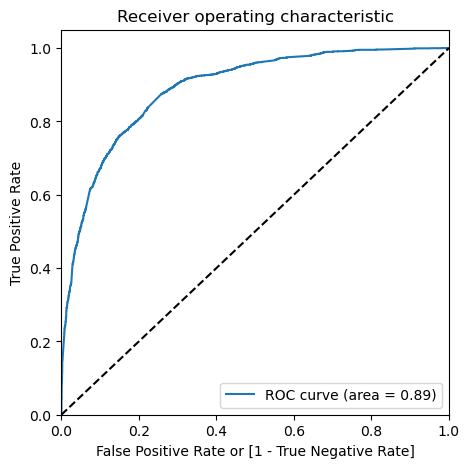

In [83]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [84]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.184566,0,1,1,0,0,0,0,0,0,0,0
1,1.0,0.904097,1,1,1,1,1,1,1,1,1,1,1
2,1.0,0.985676,1,1,1,1,1,1,1,1,1,1,1
3,1.0,0.605342,1,1,1,1,1,1,1,1,0,0,0
4,0.0,0.434919,0,1,1,1,1,1,0,0,0,0,0


In [85]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.388683,1.000000,0.000000
0.1,0.1,0.588126,0.984487,0.336115
0.2,0.2,0.766543,0.917661,0.670460
0.3,0.3,0.791280,0.878282,0.735964
0.4,0.4,0.811379,0.772872,0.835862
0.5,0.5,0.814471,0.704853,0.884168
0.6,0.6,0.806895,0.638425,0.914011
0.7,0.7,0.783241,0.526253,0.946636
0.8,0.8,0.761905,0.441527,0.965604
0.9,0.9,0.711812,0.278441,0.987355


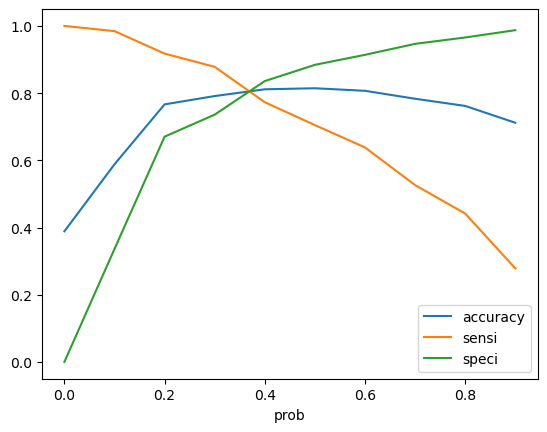

In [86]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [87]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.184566,0,1,1,0,0,0,0,0,0,0,0,0
1,1.0,0.904097,1,1,1,1,1,1,1,1,1,1,1,1
2,1.0,0.985676,1,1,1,1,1,1,1,1,1,1,1,1
3,1.0,0.605342,1,1,1,1,1,1,1,1,0,0,0,1
4,0.0,0.434919,0,1,1,1,1,1,0,0,0,0,0,1


In [88]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8078231292517006

In [89]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3250,  704],
       [ 539, 1975]], dtype=int64)

In [90]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [91]:
# Calculating the sensitivity
TP/(TP+FN)

0.7856006364359587

In [92]:
# Calculating the specificity
TN/(TN+FP)

0.8219524532119373

#### Notes - Optimise Cut off (ROC Curve)

* <font color= lightgreen> ROC area under the curve values are in acceptable range(0.89)
* <font color= lightgreen> To find optimum cutoff for the Probability conversion rate , we have used function to determine the best possible value as '0.38'
* <font color= lightgreen> With the current cut off as 0.38 we have accuracy 80%, sensitivity-78% and specificity of around 82%

## 8.0 Prediction on Test set

In [93]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [94]:
# Substituting all the columns in the final train model
col = X_train.columns

In [95]:
# Adding choosen Col with selected features to X_test
X_test = X_test[col]
# Adding constant to X_test
X_test_sm=sm.add_constant(X_test)
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Occupation_Working Professional,Occupation_not provided,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
567,1.0,0.015936,0.147359,1,0,0,0,0,0,0,0,0,0
2303,1.0,0.007968,0.688859,1,0,0,0,0,0,0,0,0,0
1523,1.0,0.011952,0.596538,0,0,0,0,0,0,0,0,0,0
6923,1.0,0.019920,0.083000,1,0,0,0,0,0,0,0,0,0
7841,1.0,0.007968,0.311585,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,1.0,0.007968,0.118065,0,0,0,0,0,1,0,1,0,0
1049,1.0,0.031873,0.703506,0,0,0,0,0,0,0,0,0,0
7778,1.0,0.007968,0.135375,1,0,0,0,0,0,0,0,0,0
6432,1.0,0.000000,0.000000,0,0,1,0,0,1,0,0,0,0


In [96]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
#Converting y_test_pred and y_test to dataframes
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
                     
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()


,Converted,Conversion_Prob
0,0.0,0.168874
1,0.0,0.694861
2,0.0,0.682620
3,0.0,0.134677
4,0.0,0.289375


In [97]:
# Making prediction using cut off 0.38 as predicted in the above section
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0.0,0.168874,0
1,0.0,0.694861,1
2,0.0,0.682620,1
3,0.0,0.134677,0
4,0.0,0.289375,0


In [98]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8102453102453102

In [99]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1424,  301],
       [ 225,  822]], dtype=int64)

In [100]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [101]:
# Calculating the sensitivity
TP/(TP+FN)

0.7851002865329513

In [102]:
# Calculating the specificity
TN/(TN+FP)

0.8255072463768116

#### Notes - Prediction on Test set

* <font color= lightgreen> With the current cut off as 0.38 , On test set we have accuracy 81%, sensitivity-78% and specificity of around 82%

## 9.0 Precision and Recall

In [103]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3496,  458],
       [ 742, 1772]], dtype=int64)

In [104]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7946188340807175

In [105]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7048528241845664

#### 9.1 Precision and recall tradeoff

In [106]:
from sklearn.metrics import precision_recall_curve

In [107]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

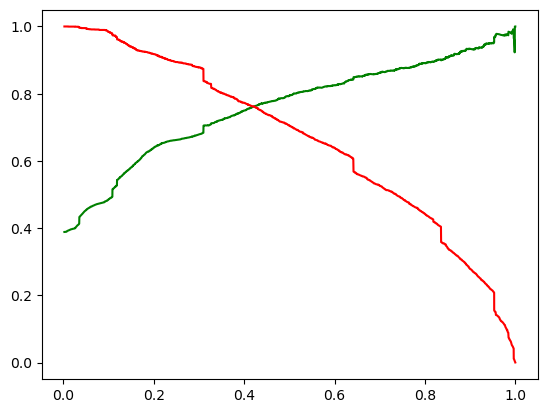

In [108]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [109]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.184566,0,1,1,0,0,0,0,0,0,0,0,0
1,1.0,0.904097,1,1,1,1,1,1,1,1,1,1,1,1
2,1.0,0.985676,1,1,1,1,1,1,1,1,1,1,1,1
3,1.0,0.605342,1,1,1,1,1,1,1,1,0,0,0,1
4,0.0,0.434919,0,1,1,1,1,1,0,0,0,0,0,1


In [110]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8147804576376005

In [111]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3353,  601],
       [ 597, 1917]], dtype=int64)

In [112]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [113]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.76131850675139

In [114]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7625298329355609

#### Notes - Precision and Recall

* <font color= lightgreen> With the current cut off as 0.42 , On test set we have accuracy 81%, precision-76% and recall of around 76%

## 10. Prediction on Test set - Precision & Recall based value

In [115]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
#Converting y_test_pred and y_test to dataframes
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
                     
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0.0,0.168874
1,0.0,0.694861
2,0.0,0.682620
3,0.0,0.134677
4,0.0,0.289375


In [116]:
# Making prediction using cut off 0.42
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0.0,0.168874,0
1,0.0,0.694861,1
2,0.0,0.682620,1
3,0.0,0.134677,0
4,0.0,0.289375,0
...,...,...,...
2767,0.0,0.203144,0
2768,0.0,0.800454,1
2769,0.0,0.154152,0
2770,0.0,0.641333,1


In [117]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8142135642135642

In [118]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1461,  264],
       [ 251,  796]], dtype=int64)

In [119]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [120]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7509433962264151

In [121]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7602674307545367

#### Notes - Prediction on Test set - Precision and Recall based value

* <font color= lightgreen> With the current cut off as 0.42 , On test set we have accuracy 81%, precision-75% and recall of around 76%

## Summary
**the variables that mattered the most in the potential Customers are (In descending order)** :  
<font color= lightgreen>1.	Total visits.<br>
<font color= lightgreen>2.	The total time spend on Website.<br>
<font color= lightgreen>3.	When the lead origin was: <br>
<font color= lightgreen>a.	Lead Add form<br>
<font color= lightgreen>4.	When the last notable activity was:<br>
<font color= lightgreen>a.	Had a phone conversation<br>
<font color= lightgreen>b.	Unreachable(Though Customer was unreachable it has a positive coefficient)<br>
<font color= lightgreen>5.	When the last activity was:<br>
<font color= lightgreen>a.	SMS sent<br>
<font color= lightgreen>6.	When the Lead source is "olark chat".<br>
<font color= lightgreen>7.	When their current occupation is as a working professional.<br>

**the variables that negatively effected the most in the potential customers are (In descending order)** :  

<font color= lightgreen>1.	When the lead origin was: <br>
<font color= lightgreen>a.	Landing Page submission<br>
<font color= lightgreen>2.	When the last activity was:<br>
<font color= lightgreen>a.	Olark Chat conversation<br>
<font color= lightgreen>3.	When the lead source is "olark chat".
<font color= lightgreen>4.	When their current occupation is Not provided.<br>

**The Overall idea is to drastically improve Postively impacting features and omitting Negatively impacting features**

**Keeping these factors of features into account "X Education" can flourish by using the new form factors for Leads,As they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.**